In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.ensemble import RandomForestRegressor


In [2]:
def funcArmonica(x, a, b):
    return a * np.sin(b*2*np.pi*x)

In [9]:
n_periodo = 1000
t_final = 2
amp = 3.0
freq = 5.0 # Hz
N = int(n_periodo*t_final*freq)
t_data = np.linspace(0, t_final, N)
y_sr = funcArmonica(t_data, amp, freq)
y_data = y_sr + 1.0*np.random.normal(size = N)

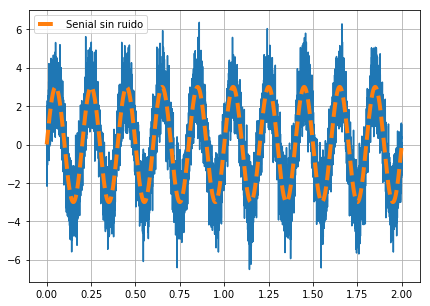

In [10]:
plt.figure(figsize=(7,5))
plt.plot(t_data,y_data)
plt.plot(t_data,y_sr, '--', lw = 4, label = 'Senial sin ruido')
plt.grid()
plt.legend()
plt.show()

In [11]:
params, params_covariance = optimize.curve_fit(funcArmonica, t_data[0:2*n_periodo], y_data[0:2*n_periodo], bounds=(1, [5, 10]))
print(params)
print(params_covariance)

[2.98499667 4.99919085]
[[3.96619678e-04 1.00894108e-06]
 [1.00894108e-06 3.37962980e-06]]


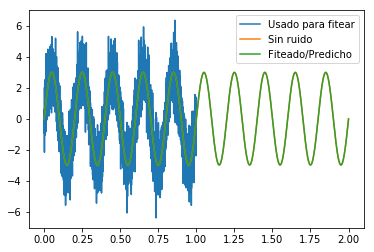

In [12]:
plt.plot(t_data[0:N//2],y_data[0:N//2], label = 'Usado para fitear')
plt.plot(t_data, y_sr,label='Sin ruido')
plt.plot(t_data, funcArmonica(t_data, params[0], params[1]),label='Fiteado/Predicho')

plt.legend(loc='best')
plt.show()

In [13]:
error = np.sqrt(np.sum((funcArmonica(t_data, params[0], params[1]) - y_sr)**2))
print(error)

1.6225713024911441


### Ajuste por RF

In [14]:
k = 1000
x_nueva_forma = np.zeros((N - k,k))
y_nueva_forma = np.zeros(N - k)

In [15]:
for i in range(x_nueva_forma.shape[0]):
    x_nueva_forma[i,:] = y_data[i:i+k]
    y_nueva_forma[i] = y_data[i+k]

In [16]:
x_nueva_forma.shape, y_nueva_forma.shape

((9000, 1000), (9000,))

In [17]:
x_train = x_nueva_forma[:N//2,:]
y_train = y_nueva_forma[:N//2]

In [18]:
x_train.shape

(5000, 1000)

In [19]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10).fit(x_train,y_train)

In [20]:
y_pred = rf.predict(x_nueva_forma)

In [21]:
y_pred.shape

(9000,)

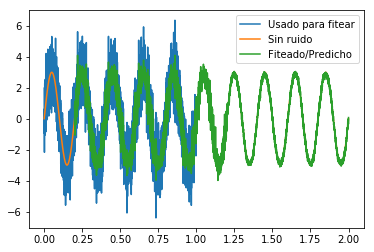

In [22]:
plt.plot(t_data[0:N//2],y_data[0:N//2], label = 'Usado para fitear')
plt.plot(t_data, y_sr, label='Sin ruido')
plt.plot(t_data[k:], y_pred,label='Fiteado/Predicho')

plt.legend(loc='best')
plt.show()

### Estimar segunda mitad sin mirar

In [23]:
cantidad_estimaciones = N//2
predicciones = []
for i in range(cantidad_estimaciones):
    if i == 0:
        x_prediccion = y_data[N//2 - k + 1 + i : N//2 + 1 + i]
        #print(x_prediccion.shape)
        y_pred_fecha = rf.predict(x_prediccion.reshape(1,-1))
        #print(y_pred_fecha)
        predicciones.append(y_pred_fecha)
    else:
        x_prediccion = np.append(x_prediccion, predicciones[-1])
        #print(x_prediccion)
        #print(x_prediccion.shape)
        y_pred_fecha = rf.predict(x_prediccion[i:].reshape(1,-1))
        #print(y_pred_fecha)
        predicciones.append(y_pred_fecha)

    

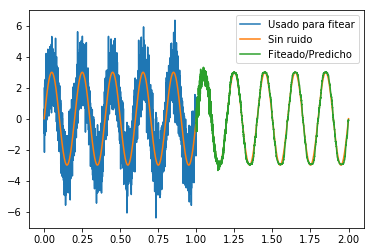

In [24]:
plt.plot(t_data[0:N//2],y_data[0:N//2], label = 'Usado para fitear')
plt.plot(t_data, y_sr, label='Sin ruido')
plt.plot(t_data[N//2:], predicciones,label='Fiteado/Predicho')

plt.legend(loc='best')
plt.show()

### Cambiando el modelo

In [25]:
def funcAmortiguada(x, a, b, c):
    return a * np.sin(b*2*np.pi*x) *np.exp(-c*x)

In [26]:
n_periodo = 1000
t_final = 5
amp = 3.0
freq = 5.0 # Hz
N = int(n_periodo*t_final*freq)
t_data = np.linspace(0, t_final, N)

gamma = 0.5
y_sr = funcAmortiguada(t_data, amp, freq, gamma)
y_data = y_sr + 0.1*np.random.normal(size = N)

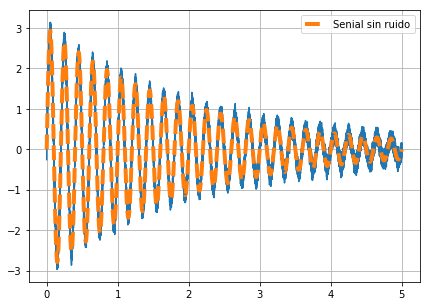

In [27]:
plt.figure(figsize=(7,5))
plt.plot(t_data,y_data)
plt.plot(t_data,y_sr, '--', lw = 4, label = 'Senial sin ruido')
plt.grid()
plt.legend()
plt.show()

In [31]:
params, params_covariance = optimize.curve_fit(funcArmonica, t_data[0:2*n_periodo], y_data[0:2*n_periodo], bounds=(1, [5, 10]))
print(params)
print(params_covariance)

[2.71777971 5.0045404 ]
[[2.14517494e-05 3.70097273e-07]
 [3.70097273e-07 1.36319968e-06]]


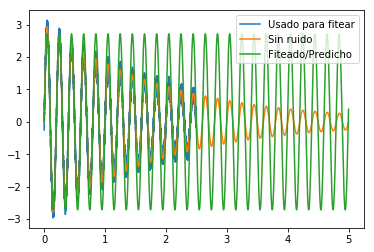

In [33]:
plt.plot(t_data[0:N//2],y_data[0:N//2], label = 'Usado para fitear')
plt.plot(t_data, y_sr,label='Sin ruido')
plt.plot(t_data, funcArmonica(t_data, params[0], params[1]),label='Fiteado/Predicho')

plt.legend(loc='best')
plt.show()

In [ ]:
error = np.sqrt(np.sum((func(t_data, params[0], params[1]) - y_sr)**2))
print(error)

### Cambio de actitud

In [34]:
k = 1000
x_nueva_forma = np.zeros((N - k,k))
y_nueva_forma = np.zeros(N - k)

In [35]:
for i in range(x_nueva_forma.shape[0]):
    x_nueva_forma[i,:] = y_data[i:i+k]
    y_nueva_forma[i] = y_data[i+k]

In [36]:
x_nueva_forma.shape, y_nueva_forma.shape

((24000, 1000), (24000,))

In [37]:
x_train = x_nueva_forma[:N//2,:]
y_train = y_nueva_forma[:N//2]

In [38]:
x_train.shape

(12500, 1000)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10).fit(x_train,y_train)

In [39]:
y_pred = rf.predict(x_nueva_forma)

In [40]:
y_pred.shape

(24000,)

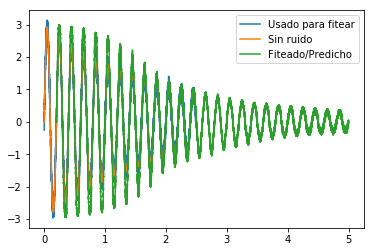

In [41]:
plt.plot(t_data[0:N//2],y_data[0:N//2], label = 'Usado para fitear')
plt.plot(t_data, y_sr, label='Sin ruido')
plt.plot(t_data[k:], y_pred,label='Fiteado/Predicho')

plt.legend(loc='best')
plt.show()

### Estimar segunda mitad sin mirar

In [50]:
cantidad_estimaciones = N//2
predicciones = []
for i in range(cantidad_estimaciones):
    if i == 0:
        x_prediccion = y_data[N//2 - k + 1 + i : N//2 + 1 + i]
        #print(x_prediccion.shape)
        y_pred_fecha = rf.predict(x_prediccion.reshape(1,-1))
        #print(y_pred_fecha)
        predicciones.append(y_pred_fecha)
    else:
        x_prediccion = np.append(x_prediccion, predicciones[-1])
        #print(x_prediccion)
        #print(x_prediccion.shape)
        y_pred_fecha = rf.predict(x_prediccion[i:].reshape(1,-1))
        #print(y_pred_fecha)
        predicciones.append(y_pred_fecha)

    

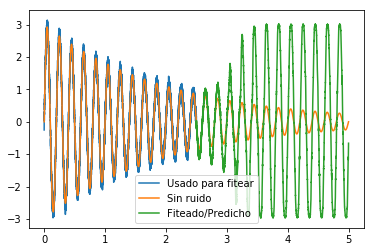

In [51]:
plt.plot(t_data[0:N//2],y_data[0:N//2], label = 'Usado para fitear')
plt.plot(t_data, y_sr, label='Sin ruido')
plt.plot(t_data[N - cantidad_estimaciones:], predicciones,label='Fiteado/Predicho')

plt.legend(loc='best')
plt.show()

### NO SIRVE

In [ ]:
from sklearn.ensemble import RandomForestRegressor

N_ventana = N//2
y_pred = []

for j in range(N - N_ventana):
    #print(j)
    if j==0:
        x_train = x_data[j:N_ventana+j].reshape(-1,1)
        y_train = y_data[j:N_ventana+j]
        rf = RandomForestRegressor(n_estimators=10, max_depth=10).fit(x_train,y_train)
        y_rf = rf.predict(x_data[N_ventana+j].reshape(-1, 1))
        y_pred.append(y_rf[0])
        
    else:
        x_train = x_data[j:N_ventana+j].reshape(-1,1)
        #print(y_pred)
        y_train = np.append(y_train, y_pred[-1])
        #print(x_train.shape,y_train.shape)
        rf = RandomForestRegressor(n_estimators=100, max_depth=10).fit(x_train,y_train[j:])
        y_rf = rf.predict(x_data[N_ventana+j].reshape(-1, 1))
        y_pred.append(y_rf[0])

In [ ]:
plt.plot(x_data[0:N_ventana], y_data[0:N_ventana], label = 'Usado para entrenar')
plt.plot(x_data[N_ventana:], y_pred, label = 'Predicho')
plt.plot(x_data, y_sr, label = 'Original')
plt.xlim([0.99, 1.2])
plt.ylim([-0.5, 0.5])
#plt.plot(x_data, y_rf,label='Fitted function')

plt.legend(loc='best')
plt.show()

In [ ]:

N_ventana = N//2
y_pred = []

for j in range(N - N_ventana):
    if j%100 == 0:
        print(j)
    if j==0:
        x_train = x_data[j:N_ventana+j].reshape(-1,1)
        y_train = y_data[j:N_ventana+j]
        rf = RandomForestRegressor(n_estimators=10, max_depth=10).fit(x_train,y_train)
        y_rf = rf.predict(x_data[N_ventana+j].reshape(-1, 1))
        y_pred.append(y_rf[0])
        
    else:
        x_train = x_data[j:N_ventana+j].reshape(-1,1)
        #print(y_pred)
        #y_train = np.append(y_train, y_pred[-1])
        y_train = y_data[j:N_ventana+j]
        #print(x_train.shape,y_train.shape)
        rf = RandomForestRegressor(n_estimators=100, max_depth=10).fit(x_train,y_train)
        y_rf = rf.predict(x_data[N_ventana+j].reshape(-1, 1))
        y_pred.append(y_rf[0])

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(x_data[N//2:], y_pred, label = 'Predicho')
plt.plot(x_data, y_sr, label = 'Original')

#plt.plot(x_data, y_rf,label='Fitted function')

plt.legend(loc='best')
plt.show()